In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['font.size'] = 20

In [2]:
import networkx as nx

In [3]:
import numpy as np
from scipy import linalg
import cvxopt
from cvxopt import matrix

In [4]:
import examples as eg
import graph as gph

In [5]:
import sys
import diffnet as dn
from test_diffnet import fabricate_measurements

In [6]:
SAMPLES = [ 'A', 'D', 'Etree', 'cstv', 'csts', 'cstn', 'MSTv', 'MSTs', 'MSTn']
OPTS = [ 'A', 'E', 'D']
SAMPLE_LABELS = dict(A='$A$-optimal', D='$D$-optimal', E='$E$-optimal', Etree='$E$-optimal',
                  cstv=r'$n_{e}\propto s_{e}^2$', csts=r'$n_{e}\propto s_{e}$', cstn=r'$n_{e} = const$',
                  MSTv=r'$n_{e}\propto s_{e}^2$ (MST)', MSTs=r'$n_{e}\propto s_{e}$ (MST)',
                  MSTn=r'ref: $n_{e} = const$ (MST)')
OPT_LABELS = dict(A=r'$\frac{\mathrm{tr}(C)}{\mathrm{tr}(C_{\mathrm{ref}})}$',
                  E=r'$\frac{||C||_2}{||C_{\mathrm{ref}}||_2}$',
                  D=r'$\ln\left(\frac{\det(C))}{\det(C_\mathrm{ref})}\right)$')

In [7]:
def draw_optimalities( sij, results, pos=None, nodescale=2.5, origins=None, node_color=None):
    '''
    '''
    K = sij.size[0]
    if node_color is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:K]
    else:
        colors = node_color
    while (len(colors) < K): colors += colors
    fig, axes = plt.subplots( 2, 2, sharex=True, sharey=True, figsize=(8,10))
    title = dict(D=r'$D$', A=r'$A$', E=r'$E$', MST='MST', Etree=r'$E$')
    if pos is None:
        pos = nx.spring_layout( gph.diffnet_to_graph( sij))
    for i, o in enumerate([ 'D', 'A', 'Etree', 'MST']):
        nij = results[o]
        C = dn.covariance( cvxopt.div(nij, sij**2))
        stats = dict( D=np.log(linalg.det( C)),
                    A=np.trace( C),
                    E=np.max(linalg.eig(C)[0]).real)
        G = gph.diffnet_to_graph( nij, origins)
        ax = axes[i/2, i%2]
        if (origins is not None):
            originIDs = list(set(origins))
            originIDs.sort()
        else:
            originIDs = ['O']
        mypos = gph.draw_diffnet_graph( G, pos=pos, ax=ax, node_color=colors, nodescale=nodescale, origins=originIDs)
        xy = np.array( mypos.values())
        ymin, ymax = np.min( xy[:,1]), np.max( xy[:,1])
        dy = ymax - ymin
        xmin = np.min( xy[:,0])
        th = 0.15
        ax.set_title( title[o])
        ax.text( xmin, ymin - th*dy, r'$\ln(\det(C)) = %.1f$' % stats['D'])
        ax.text( xmin, ymin - 2*th*dy, r'tr$(C) = %.1f$' % stats['A'])
        ax.text( xmin, ymin - 3*th*dy, r'$||C||_2$ = %.1f' % stats['E'])
        ax.axis( 'off')
        ax.set_aspect( 1)
    fig.subplots_adjust( hspace=0.5)
    return fig

In [8]:
K = 20 # number of points

### Difference network for $s_{ij} = |s_i - s_j|$

In [9]:
reload(dn)

<module 'diffnet' from 'diffnet.pyc'>

In [10]:
np.random.seed( 2001)
K0 = 5
s0 = (2 - .2)*np.random.rand( K0) + 0.2
x0 = np.cumsum( s0)
# K0 = 5
# x0 = np.arange( 1., K0+1, 1)
sij0 = np.diag( x0)
for i in xrange(K0):
    for j in xrange(i+1, K0):
        sij0[i,j] = sij0[j,i] = x0[j] - x0[i]
sij0 = matrix( sij0)        

In [11]:
results = dn.optimize( sij0, optimalities=[ 'D', 'A', 'Etree'] )

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -4.8629e+01  2e+01  1e+00  1e+00
 1: -1.5995e+00 -5.8308e-01  3e+00  2e-01  4e-01
 2:  1.4589e+00  4.1618e+00  1e+00  8e-02  3e-01
 3:  4.8619e+00  6.7909e+00  3e-01  3e-02  5e-01
 4:  6.4852e+00  7.4570e+00  1e-01  1e-02  3e-01
 5:  7.4405e+00  7.6494e+00  3e-02  3e-03  8e-02
 6:  7.6660e+00  7.6762e+00  1e-03  2e-04  5e-03
 7:  7.6775e+00  7.6776e+00  2e-05  2e-06  6e-05
 8:  7.6776e+00  7.6776e+00  2e-07  2e-08  6e-07
 9:  7.6776e+00  7.6776e+00  2e-09  2e-10  6e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+02  4e+00  4e+01  1e+00
 1:  4.0587e+00  4.3902e+00  3e+01  1e+00  1e+01  6e-01
 2:  6.9102e+00  8.0527e+00  1e+02  2e+00  2e+01  2e+00
 3:  1.2933e+01  1.3520e+01  3e+01  5e-01  4e+00  7e-01
 4:  1.6696e+01  1.7307e+01  4e+01  4e-01  3e+00  7e-01
 5:  2.3568e+01  2.4063e+01  3e+01  2e-01  2e+00  5e-01
 6:  3.1586e+01  3.2095e+01  2e+01  1e-01  1e+00

In [12]:
results.update( dict(
    MST=dn.MST_optimize( sij0, 'n')))

In [13]:
def distnet_us( x0):
    K = len(x0)
    u = np.zeros( K)
    u[0] = x0[0]/np.sqrt(K)
    s = np.sqrt(K)*x0[0]
    for i in xrange( 1, K):
        u[i] = u[i-1] + (x0[i] - x0[i-1])/np.sqrt(K-i)
        s += (x0[i] - x0[i-1])*np.sqrt(K-i)
    return u*s

In [14]:
def distnet_minTrC( xs):
    K = len(xs)
    trC = np.sqrt(K)*xs[0]
    for i in xrange( 1, K):
        trC += np.sqrt(K-i)*(xs[i] - xs[i-1])
    return trC**2

In [15]:
distnet_us( x0)

array([ 2.04733681,  3.62777621, 13.80490371, 26.01594311, 38.05945262])

In [16]:
distnet_minTrC( x0)

83.55541245650082

In [17]:
np.sum( distnet_us( x0))

83.55541245650082

In [18]:
def draw_distnet( xs, results):
    fig, axes = plt.subplots( 3, 1, sharex=True, figsize=(5, 8))
    xmax = np.max( xs)
    dy = xmax/(len(xs) - 1.)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:len(xs)]
    pos = np.array( [ ( x, (i*i-2)*dy ) for i, x in enumerate( xs) ] + [ (0, 0) ])
    titles = dict( D=r'$D$', A=r'$A$', Etree=r'$E$')
    allocation = dict(
    D = r'$n_{i\, i+1} = \mathrm{const}$',
    A = r'$n_{i\, i+1} \propto \sqrt{m-i}\cdot(s_{i+1} - s_i)$',
    Etree = r'$n_i \propto s_i^2$')
    for i, o in enumerate( [ 'D', 'A', 'Etree']):
        ax = axes[i]
        nij = results[o]
        g = gph.diffnet_to_graph( nij, 'O')
        mypos = gph.draw_diffnet_graph( g, pos=pos, ax=ax, node_color=colors, nodescale=20, widthscale=30, origins='O')
        ax.spines['left'].set_visible( False)
        ax.spines['right'].set_visible( False)
        ax.spines['top'].set_visible( False)
        ax.set_title( titles[o])
        ax.text( 0.5*xmax, -2., allocation[o], verticalalignment='center')
        if i!=2: 
            ax.spines['bottom'].set_visible( False)
            ax.xaxis.set_visible( False)
        else:
            ax.xaxis.set_ticks( [ 0 ])
            ax.set_xlabel( r'$s_i$')
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
            # manual arrowhead width and length
            hw = 1./10.*(ymax-ymin) 
            hl = 1./20.*(xmax-xmin)
            lw = 1. # axis line width
            ohg = 0.3 # arrow overhang

            # get width and height of axes object to compute 
            # matching arrowhead length and width
            dps = fig.dpi_scale_trans.inverted()
            bbox = ax.get_window_extent().transformed(dps)
            width, height = bbox.width, bbox.height
            # compute matching arrowhead length and width
            yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
            yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
            ax.arrow(xmin, ymin, xmax-xmin, 0, fc='k', ec='k', lw = lw, 
                 head_width=hw, head_length=hl, overhang = ohg, 
                 length_includes_head= True, clip_on = False)        
        ax.yaxis.set_visible( False)
        ax.set_aspect( 'auto')
    fig.subplots_adjust(hspace=0.5)
    return fig

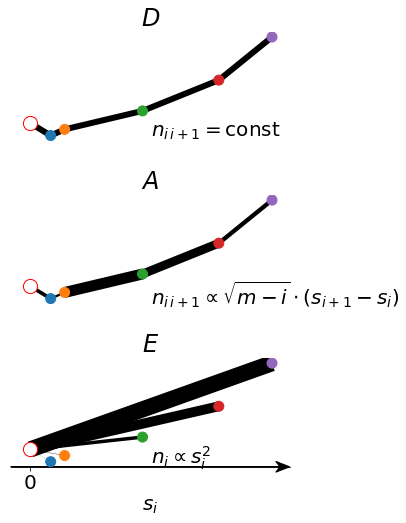

In [19]:
figdistnets = draw_distnet( x0, results)

In [20]:
# figdistnets.savefig( 'const-rel-error.eps', bbox_inches='tight')

In [21]:
np.array(results['Etree'])/np.square(np.array(sij0))

array([[0.01510454, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01510454, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01510454, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.01510454, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01510454]])

In [22]:
distnet_minTrC( x0) - np.sum( x0*x0)

17.350145145042205

Check that $\sum_{i\neq j} n_{ij} = 1$

In [23]:
[ dn.sum_upper_triangle( results[o]) for o in results ]

[0.9999991315340555, 1.0, 0.9999999999999999, 1.0000000006518794]

## COX-2 alchemistry

In [24]:
nheavy = dict(A1=7, A2=6, B1=9, B2=6, C1=10, C2=10)

In [25]:
sCOX2 = np.diag( [nheavy['A1'] + nheavy['B1'] + nheavy['C1'],
                  nheavy['A1'] + nheavy['B1'] + nheavy['C2'],
                  nheavy['A1'] + nheavy['B2'] + nheavy['C1'],
                  nheavy['A1'] + nheavy['B2'] + nheavy['C2'],
                  nheavy['A2'] + nheavy['B1'] + nheavy['C1'],
                  nheavy['A2'] + nheavy['B1'] + nheavy['C2'],
                  nheavy['A2'] + nheavy['B2'] + nheavy['C1'],
                  nheavy['A2'] + nheavy['B2'] + nheavy['C2']]) + \
       np.array( [[ 0,  1, 16, 17,  1,  2, 16, 17],
                  [ 1,  0, 17, 16,  2,  1, 17, 16],
                  [16, 17,  0,  1, 16, 17,  1,  2],
                  [17, 16,  1,  0, 17, 16,  2,  1],
                  [ 1,  2, 16, 17,  0,  1, 16, 17],
                  [ 2,  1, 17, 16,  1,  0, 17, 16],
                  [16, 17,  1,  2, 16, 17,  0,  1],
                  [17, 16,  2,  1, 17, 16,  1,  0]], dtype=float)
sCOX2 = np.sqrt( sCOX2)
sCOX2 = matrix( sCOX2)

In [26]:
print sCOX2

[ 5.10e+00  1.00e+00  4.00e+00  4.12e+00  1.00e+00  1.41e+00  4.00e+00 ... ]
[ 1.00e+00  5.10e+00  4.12e+00  4.00e+00  1.41e+00  1.00e+00  4.12e+00 ... ]
[ 4.00e+00  4.12e+00  4.80e+00  1.00e+00  4.00e+00  4.12e+00  1.00e+00 ... ]
[ 4.12e+00  4.00e+00  1.00e+00  4.80e+00  4.12e+00  4.00e+00  1.41e+00 ... ]
[ 1.00e+00  1.41e+00  4.00e+00  4.12e+00  5.00e+00  1.00e+00  4.00e+00 ... ]
[ 1.41e+00  1.00e+00  4.12e+00  4.00e+00  1.00e+00  5.00e+00  4.12e+00 ... ]
[ 4.00e+00  4.12e+00  1.00e+00  1.41e+00  4.00e+00  4.12e+00  4.69e+00 ... ]
[ 4.12e+00  4.00e+00  1.41e+00  1.00e+00  4.12e+00  4.00e+00  1.00e+00 ... ]



In [27]:
def cubeLayout( origin=False):
    front = np.array( [[0, 0],
                       [0, 1],
                       [1, 0],
                       [1, 1]])
    back = front + np.array( [ 0.5, np.sqrt(3)/6])
    if not origin:
        return np.concatenate( [front, back])
    o = np.array( [np.sqrt(3)/6, -0.25])
    return np.concatenate( [front, back, [o]])

(-0.09042485441002773,
 1.590424854410028,
 -0.3586289810874749,
 1.382197673270029)

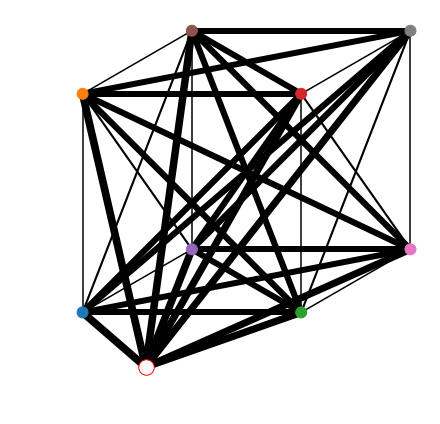

In [28]:
figCOX2s, ax = plt.subplots( figsize=(7, 7))
gph.draw_diffnet_graph( gph.diffnet_to_graph( sCOX2), pos=cubeLayout( True), ax=ax, widthscale=1.5, nodescale=15, node_color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8])
ax.set_aspect( 1)
ax.axis('off')
# figCOX2s.savefig( 'COX2-sij.eps')

In [29]:
results = dn.optimize( sCOX2, optimalities=[ 'D', 'A', 'Etree'] )
results.update( dict(
    MST=dn.MST_optimize( sCOX2, 'n')))

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -1.2640e+02  4e+01  1e+00  1e+00
 1: -1.8976e+00  1.8454e+00  4e+00  1e-01  3e-01
 2:  5.9161e+00  1.2223e+01  1e+00  5e-02  6e-01
 3:  1.5502e+01  2.3937e+01  3e-01  7e-02  5e+01
 4:  1.9371e+01  2.3425e+01  1e-01  4e-02  3e+01
 5:  2.2016e+01  2.2468e+01  5e-02  4e-03  1e+01
 6:  2.1708e+01  2.2055e+01  2e-02  3e-03  9e+00
 7:  2.1388e+01  2.1652e+01  9e-03  2e-03  5e+00
 8:  2.1206e+01  2.1391e+01  3e-03  2e-03  2e+00
 9:  2.1192e+01  2.1287e+01  7e-04  8e-04  8e-01
10:  2.1239e+01  2.1266e+01  9e-05  2e-04  2e-01
11:  2.1262e+01  2.1265e+01  5e-06  2e-05  1e-02
12:  2.1265e+01  2.1265e+01  1e-07  4e-07  3e-04
13:  2.1265e+01  2.1265e+01  1e-09  4e-09  3e-06
14:  2.1265e+01  2.1265e+01  1e-11  4e-11  3e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+02  5e+00  2e+01  1e+00
 1:  6.7642e+00  7.0589e+00  4e+01  1e+00  4e+00  5e-01
 2:  1.2484e+01  1.4658e+01

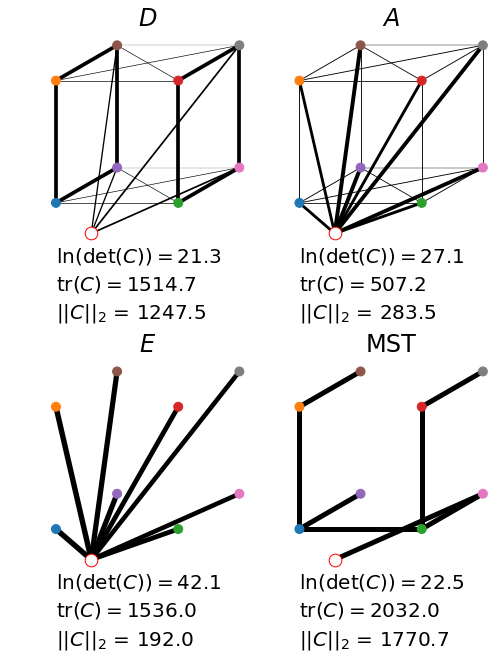

In [30]:
figCOX2n = draw_optimalities( matrix(sCOX2), results, pos=cubeLayout(True), nodescale=10)

In [31]:
# figCOX2n.savefig( 'COX2-nij.eps')

### Relative to Celecoxib and Rofecoxib

Celecoxib: A1-B1-C1
Rofecoxib: A2-B2-C2

In [32]:
CEL, ROF = 0, 7 # celecoxib and rofecoxib
def relative_sij_COX2( sCOX2):
    sCOX2rel = np.zeros( (6, 6))
    allmols = range(1, 7)
    origins = [-1]*6
    for i, a in enumerate( allmols):
        if sCOX2[a, CEL] < sCOX2[a, ROF]:
            # The closer of the two reference molecules
            sCOX2rel[i,i] = sCOX2[a, CEL]
            origins[i] = 'C'
        else:
            sCOX2rel[i,i] = sCOX2[a, ROF]
            origins[i] = 'R'
        for j in xrange(i+1, len(allmols)):
            b = allmols[j]
            sCOX2rel[i,j] = sCOX2rel[j,i] = sCOX2[a,b]
    return matrix(sCOX2rel), origins

sCOX2rel, oCOX2rel = relative_sij_COX2( sCOX2)

In [33]:
results = dn.optimize( sCOX2rel, optimalities=[ 'D', 'A', 'Etree'] )
results.update( dict(
    MST=dn.MST_optimize( sCOX2rel, 'n')))

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -5.6903e+01  2e+01  1e+00  1e+00
 1: -1.5301e+00 -1.5341e+00  4e+00  2e-01  4e-01
 2:  2.6839e+00  6.1608e+00  1e+00  7e-02  7e-01
 3:  6.3902e+00  8.6057e+00  6e-01  3e-02  5e-01
 4:  9.2028e+00  9.5696e+00  1e-01  7e-03  3e-01
 5:  9.6582e+00  9.6915e+00  1e-02  6e-04  3e-02
 6:  9.7033e+00  9.7038e+00  2e-04  1e-05  5e-04
 7:  9.7041e+00  9.7041e+00  2e-06  1e-07  5e-06
 8:  9.7041e+00  9.7041e+00  2e-08  1e-09  5e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+02  5e+00  1e+01  1e+00
 1:  4.2608e+00  4.5286e+00  3e+01  1e+00  3e+00  5e-01
 2:  1.0712e+01  1.1514e+01  7e+01  9e-01  3e+00  1e+00
 3:  1.9189e+01  1.9594e+01  2e+01  2e-01  5e-01  4e-01
 4:  2.3137e+01  2.3738e+01  4e+01  2e-01  5e-01  6e-01
 5:  3.2184e+01  3.2266e+01  6e+00  3e-02  9e-02  9e-02
 6:  3.4135e+01  3.4211e+01  6e+00  2e-02  6e-02  8e-02
 7:  3.6624e+01  3.6639e+01  1e+00  4e-03

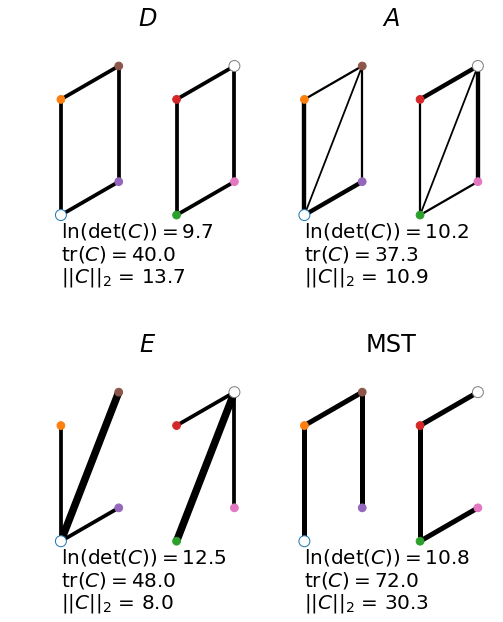

In [34]:
posCOX2 = cubeLayout( False)
posCOX2os = posCOX2[[CEL, ROF]]
posCOX2 = np.concatenate( [posCOX2[:CEL], posCOX2[CEL+1:ROF], posCOX2[ROF+1:], posCOX2os])
colorCOX2 = plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]
colorCOX2 = colorCOX2[:CEL] + colorCOX2[CEL+1:ROF] + colorCOX2[ROF+1:] + [ colorCOX2[CEL], colorCOX2[ROF] ]
figCOX2reln = draw_optimalities( matrix(sCOX2rel), results, pos=posCOX2, nodescale=10, origins=oCOX2rel, node_color=colorCOX2)

In [35]:
# figCOX2reln.savefig( 'COX2-rel-nij.eps')

## Uniform network

In [36]:
Kp=30
sijp = np.ones( (Kp, Kp), dtype=float)
sijp += np.diag( 0.*np.ones( Kp))
sijp = matrix( sijp)

In [37]:
resultsp = dn.optimize( sijp, optimalities=['D', 'A', 'Etree'])

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -5.6459e+02  5e+02  1e+00  1e+00
 1: -6.8954e+01  3.2331e+01  6e+00  2e-01  5e+00
 2:  5.6741e+01  8.3321e+01  8e-01  6e-02  2e+01
 3:  8.4407e+01  8.4647e+01  3e-02  6e-04  2e-01
 4:  8.4673e+01  8.4675e+01  3e-04  5e-06  2e-03
 5:  8.4675e+01  8.4675e+01  3e-06  5e-08  2e-05
 6:  8.4675e+01  8.4675e+01  3e-08  5e-10  2e-07
 7:  8.4675e+01  8.4675e+01  3e-10  5e-12  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  3e+03  1e+01  2e+02  1e+00
 1:  1.6270e+01  1.6584e+01  1e+03  4e+00  9e+01  7e-01
 2:  2.8183e+01  2.9047e+01  3e+03  5e+00  1e+02  1e+00
 3:  8.1440e+01  8.2318e+01  1e+03  2e+00  4e+01  1e+00
 4:  1.8132e+02  1.8184e+02  9e+02  8e-01  2e+01  6e-01
 5:  2.1843e+02  2.1871e+02  3e+02  3e-01  8e+00  3e-01
 6:  1.2265e+02  1.2376e+02  2e+03  9e-01  2e+01  1e+00
 7:  2.5543e+02  2.5566e+02  7e+02  4e-01  9e+00  3e-01
 8:  3.8815e+02  3.8826e+02  3e+02

In [38]:
resultsp.update( dict(
    MST=dn.MST_optimize( sijp, 'n')))

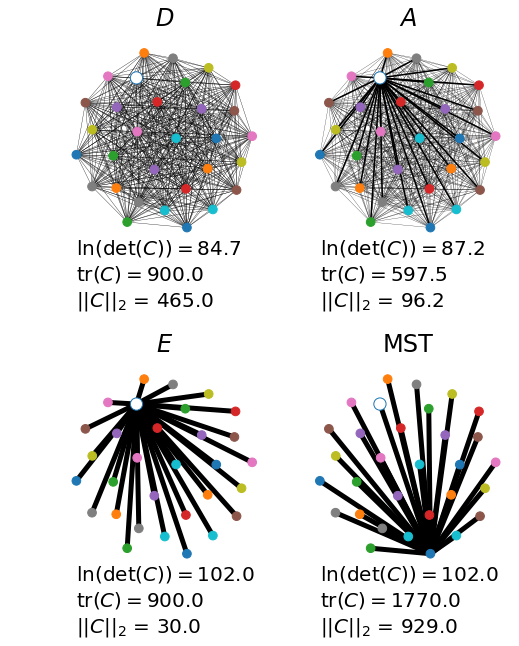

In [39]:
figuninet = draw_optimalities( sijp, resultsp)

In [40]:
np.trace(dn.covariance( cvxopt.div(resultsp['A'], sijp**2)))/np.trace(dn.covariance( cvxopt.div(resultsp['MST'], sijp**2)))

0.3375509424298265

In [41]:
np.trace(dn.covariance( cvxopt.div(resultsp['A'], sijp**2)))/np.trace(dn.covariance( cvxopt.div( sijp/dn.sum_upper_triangle( sijp), sijp**2)))

0.6638501867786607

### Random network

In [42]:
np.random.seed( 1)
sijr = matrix( np.random.rand( K, K), (K, K))
sijr = 0.5*(sijr + sijr.trans())
sijr += matrix( 3.5*np.diag( np.ones( K)), (K,K))

In [43]:
resultsr = dn.optimize( sijr, optimalities=['D', 'A', 'Etree'])

     pcost       dcost       gap    pres   dres
 0:  0.0000e+00 -2.5068e+02  2e+02  1e+00  1e+00
 1: -6.0709e+01 -6.7524e+01  3e+01  2e-01  4e-01
 2: -6.1886e+01 -5.2714e+01  1e+01  7e-02  2e-01
 3: -5.6408e+01 -4.3414e+01  5e+00  4e-02  2e-01
 4: -4.7874e+01 -3.3837e+01  2e+00  2e-02  4e-01
 5: -3.7970e+01 -2.5331e+01  9e-01  2e-02  6e-01
 6: -2.8361e+01 -1.9101e+01  4e-01  2e-02  8e-01
 7: -2.0736e+01 -1.5644e+01  2e-01  1e-02  2e+00
 8: -1.8983e+01 -1.4871e+01  1e-01  9e-03  1e+00
 9: -1.8941e+01 -1.4860e+01  1e-01  9e-03  1e+00
10: -1.4548e+01 -1.4529e+01  3e-01  2e-03  3e-01
11: -1.4382e+01 -1.4384e+01  2e-02  9e-05  3e-02
12: -1.4375e+01 -1.4376e+01  3e-03  1e-05  4e-03
13: -1.4375e+01 -1.4375e+01  1e-03  5e-06  1e-03
14: -1.4375e+01 -1.4375e+01  3e-05  6e-08  3e-05
15: -1.4375e+01 -1.4375e+01  4e-07  9e-10  4e-07
16: -1.4375e+01 -1.4375e+01  4e-09  9e-12  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  1e+03  8e+00

In [44]:
resultsr.update( dict(
    MST=dn.MST_optimize( sijr, 'n')))

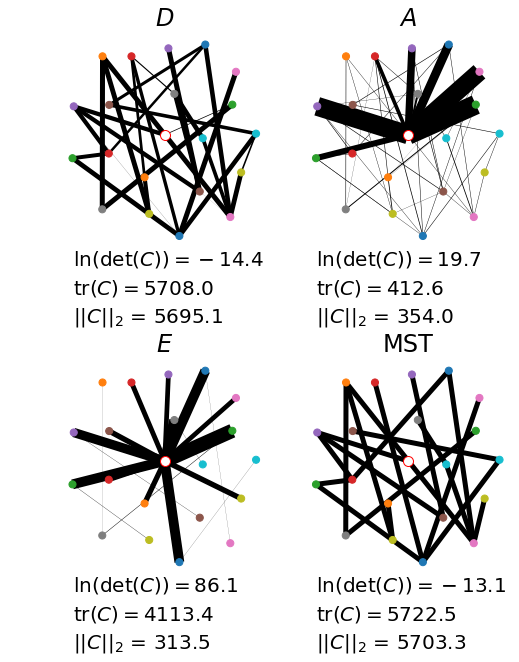

In [45]:
figrandnet = draw_optimalities( sijr, resultsr)

## Analyze the statistical behavior of the difference network

In [46]:
import cPickle as pickle

In [47]:
def plot_diffnet_statistics( stats):
    opts = stats.keys()
    samples = stats[opts[0]].keys()
    opts = OPTS
    samples = SAMPLES
    olabels = OPT_LABELS
    slabels = SAMPLE_LABELS
    nrows, ncols = len(samples), len(opts)
    fig, axes = plt.subplots( nrows, ncols, sharex='col', sharey='col', figsize=(5*ncols, 1*nrows))
    for i, sample in enumerate( samples):
        for j, opt in enumerate( opts):
            stat = stats[opt][sample]
            ax = axes[i][j]
            avg = np.mean( stat)
            std = np.std( stat)
            for p in [ 'bottom', 'top', 'right' ]:
                ax.spines[p].set_visible( False)
            ax.yaxis.set_ticklabels( [])
            if i != len(samples) - 1:
                ax.xaxis.set_visible( False)
            else:
                ax.spines['bottom'].set_visible( True)
            if sample == 'MSTn':
                _, y0 = axes[i-1][j].get_ylim()
                ax.plot( [ avg, avg ], [ 0, y0 ], 'k-', label=slabels.get(sample, sample))
                continue
            h, _, __ = ax.hist( stat, bins=10, density=True, histtype='stepfilled')
            y0 = 1.25*np.max( h)
            ax.errorbar( [ avg ], [ y0 ], xerr=[ std ], fmt='k.', linewidth=2, ecolor='r', label=slabels.get(sample, sample))
            
            if (opt=='A' and sample=='A') or (opt=='E' and sample=='Etree'):
                ax.plot( [ 1., 1. ], [ 0, y0 ], 'k--')
            if (opt=='D' and sample=='D'):
                ax.plot( [ 0., 0. ], [ 0, y0 ], 'k--')
        leg = ax.legend(loc='center left', bbox_to_anchor=(0.8, 0.5), handlelength=0, markerscale=0, frameon=False, fontsize='small')
        for h in leg.legendHandles: h.set_visible( False)
    for j, opt in enumerate( opts):
        axes[-1][j].set_xlabel( olabels[opt])
    axes[nrows/2][0].set_ylabel( 'Frequency')
    # plt.tight_layout()
    return fig

In [48]:
def plot_diffnet_efficiency( stats):
    opts = OPTS
    samples = SAMPLES
    olabels = OPT_LABELS
    slabels = SAMPLE_LABELS
    nrows, ncols = len(opts), len(samples)
    fig, axes = plt.subplots( nrows, 1, sharex=True, figsize=(8, nrows*3))
    for i, opt in enumerate( opts):
        x = np.array([ stats[opt][sample] for sample in samples ]).transpose()
        if opt=='D':
            axes[i].plot( [1, ncols], [0, 0], 'k--')
        else:
            axes[i].plot( [1, ncols], [1, 1], 'k--')
        axes[i].boxplot( x, sym='.')
        axes[i].set_ylabel( olabels[opt])
    axes[-1].set_xticklabels( [ slabels[s] for s in samples ], rotation=80, horizontalalignment='center')
    return fig
    

In [49]:
def plot_allocation_stats( topo):
    nrows = 3
    fig, axes = plt.subplots( nrows, 1, sharex=True, sharey=True)
    emin, emax = -5, 2
    nbins = 2*(emax + 1 - emin)
    ns = np.concatenate( [ [0.5*np.power(10., emin)], np.logspace( emin, emax, nbins) ])
    for i, o in enumerate( topo):
        hd, hu = topo[o]
        hd /= hd.sum()
        hu /= hu.sum()
        hd = np.concatenate( [ [ hd[0]], hd ])
        hu = np.concatenate( [ [ hu[0]], hu ])
        axes[i].step( ns[:], hd[:], where='pre', label=r'$(\varnothing,i)$')
        axes[i].step( ns[:], hu[:], where='pre', label=r'$(i,j>i)$')
        axes[i].set_xscale( 'log')
        # axes[i].set_yscale( 'log')
        axes[i].text( 2e-5, 0.5, SAMPLE_LABELS[o], fontsize='small')
    axes[0].legend( loc='best', frameon=False, fontsize='small')
    axes[-1].set_xlabel( r'$(n_e/s_e)/(N/\sum_e s_e)$')
    axes[nrows/2].set_ylabel( r'Fraction of edges')
    return fig

In [50]:
def plot_allocation_topo( topo):
    nrows = 3
    fig, axes = plt.subplots( nrows, 2, sharex='col', sharey=True, figsize=( 10, nrows*3))
    emin, emax = -5, 2
    nbins = 2*(emax + 1 - emin)
    ns = np.concatenate( [ [0.5*np.power(10., emin)], np.logspace( emin, emax, nbins) ])
    k2max = np.max( [ topo[o][-1] for o in topo ])
    for i, o in enumerate( topo):
        hd, hu, _, k2 = topo[o]
        hd /= hd.sum()
        hu /= hu.sum()
        hd = np.concatenate( [ [ hd[0]], hd ])
        hu = np.concatenate( [ [ hu[0]], hu ])
        axes[i][0].step( ns[:], hd[:], where='pre', label=r'$(\varnothing,i)$')
        axes[i][0].step( ns[:], hu[:], where='pre', label=r'$(i,j>i)$')
        axes[i][0].set_xscale( 'log')
        # axes[i].set_yscale( 'log')
        axes[i][0].text( 2e-5, 0.5, SAMPLE_LABELS[o], fontsize='small')
        axes[i][1].hist( k2, normed=True, bins=np.arange(k2max+1)-0.5)
    axes[0][0].legend( loc='best', frameon=False, fontsize='small')
    axes[-1][0].set_xlabel( r'$(n_e/s_e)/(N/\sum_e s_e)$')
    axes[-1][1].set_xlabel( r'|Edges to 2-connectivity|')
    axes[nrows/2][0].set_ylabel( r'Fraction of edges')
    axes[nrows/2][1].set_ylabel( r'Fraction of networks')
    return fig

In [51]:
def compare_two( results, o1, o2, val, blocks=5):
    stats1 = results[val][o1]
    stats2 = results[val][o2]
    ratio = stats2/stats1
    bl = len(ratio)/blocks
    bavg = [ np.mean( ratio[b*bl:(b+1)*bl]) for b in xrange(blocks)]
    return np.mean(ratio), np.std( bavg)/np.sqrt(blocks)

### Constant relative error networks

In [52]:
resultscrel = pickle.load( file( 'examples/const_rel_error_net.pkl', 'rb'))

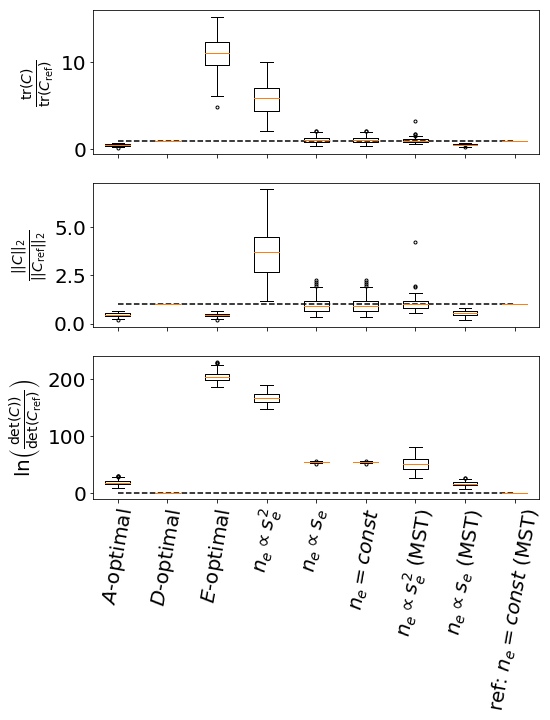

In [53]:
figeffcrel = plot_diffnet_efficiency( resultscrel['stats'])

In [54]:
# figeffcrel.savefig( 'gain_const_rel_error_nets.eps', bbox_inches='tight')

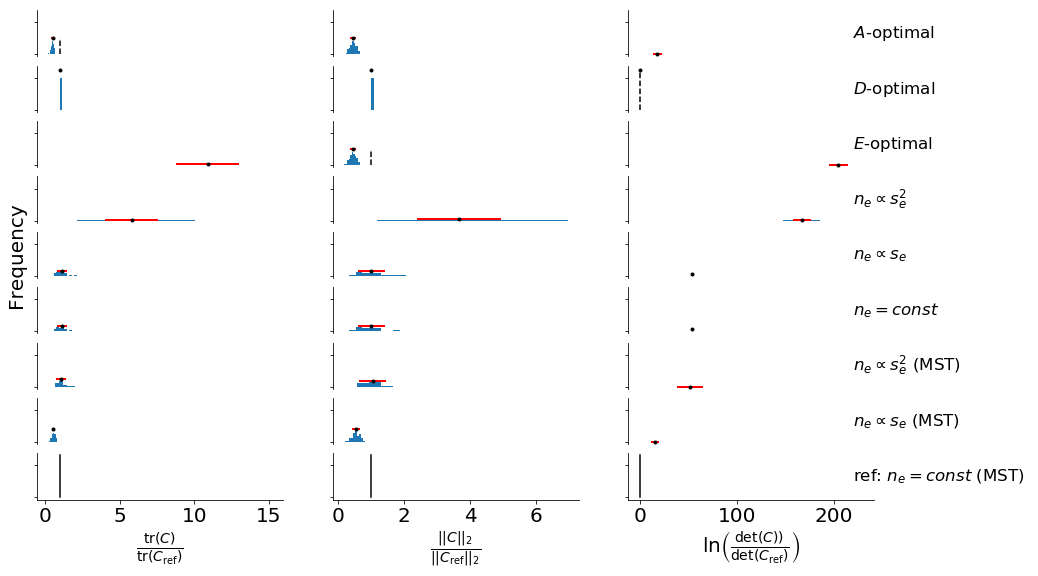

In [55]:
figstatcrel = plot_diffnet_statistics( resultscrel['stats'])

In [56]:
compare_two( resultscrel['stats'], 'csts', 'A', 'A')

(0.4697838447486248, 0.009930892250850741)

### Random networks of $\{ s_e \}$

In [57]:
resultsran = pickle.load( file( 'examples/random_net.pkl', 'rb'))

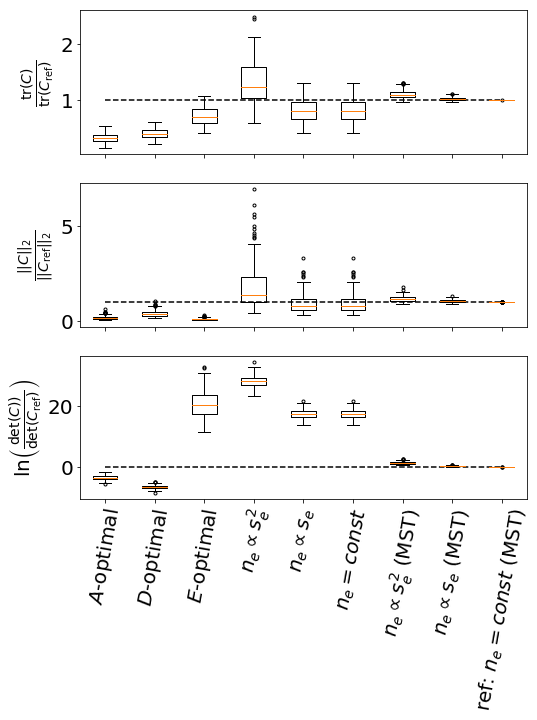

In [58]:
figeffran = plot_diffnet_efficiency( resultsran['stats'])

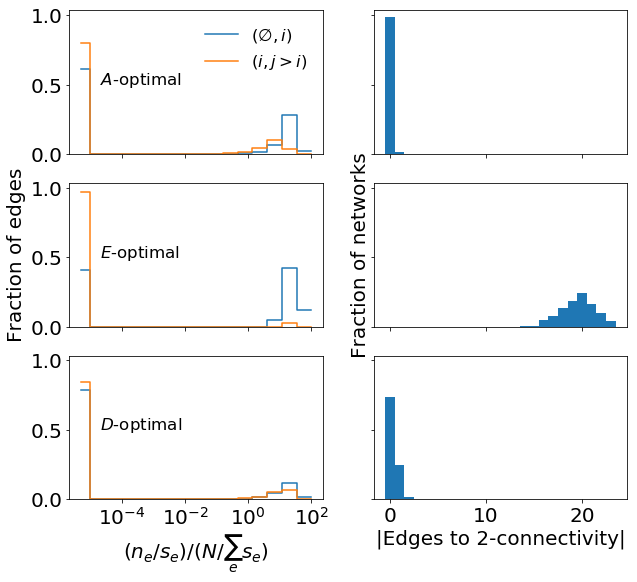

In [59]:
figtopran = plot_allocation_topo( resultsran['topo'])

In [60]:
# figeffran.savefig( 'gain_random_nets.eps', bbox_inches='tight')
# figtopran.savefig( 'topo_random_nets.eps', bbox_inches='tight')

Compare the statistics of $tr(C)$ between the $D$- and $A$-optimals.

In [61]:
compare_two( resultsran['stats'], 'D', 'A', 'A')

(0.7912653243386258, 0.0034354828096811872)

Compare the statistics of $tr(C)$ between the naive allocation of $n_e\propto s_e$ and the $A$-optimal.

In [62]:
compare_two( resultsran['stats'], 'csts', 'A', 'A')

(0.4017018287641041, 0.001344684774526533)

Percentage of the $A$-optimal networks that are not 2-connected.

In [63]:
float(np.sum(np.array(resultsran['topo']['A'][3])>0))/len(resultsran['topo']['A'][3])

0.015

In [64]:
_m = 30
(_m*(1-resultsran['topo']['A'][0][0]), _m*(_m - 1)/2*(1-resultsran['topo']['A'][1][0]))

(11.750000000000002, 86.64499999999998)

In [65]:
_m = 30
(_m*(1-resultsran['topo']['Etree'][0][0]), _m*(_m - 1)/2*(1-resultsran['topo']['Etree'][1][0]))

(17.723139104075443, 12.14999999999998)

### Uniform networks

In [66]:
resuni = pickle.load( file( 'examples/uniform_net.pkl', 'rb'))

In [67]:
resuni

{'K': array([2, 4, 8]),
 'd': array([ 0.,  5., 10., 15., 20.]),
 'stats': {'diag': array([[0.42263663, 0.46464205, 0.47923321, 0.48531537, 0.48864934],
         [0.17081472, 0.21451418, 0.2286969 , 0.23479137, 0.23817694],
         [0.06666321, 0.0978287 , 0.10820518, 0.11285518, 0.11549353]]),
  'offdiag': array([[0.15472674, 0.0707159 , 0.04153357, 0.02936925, 0.02270131],
         [0.05279019, 0.02365721, 0.01420207, 0.01013909, 0.00788204],
         [0.01666765, 0.00776323, 0.00479852, 0.00346995, 0.00271613]]),
  'vardiag': array([[3.72860037e-31, 1.77119537e-20, 8.95538290e-21, 2.89828634e-22,
          8.03906023e-21],
         [1.18252099e-31, 1.49191017e-18, 6.21797986e-13, 1.64783374e-11,
          7.79471741e-11],
         [3.65618565e-28, 7.97155961e-21, 6.81186619e-16, 9.05981738e-11,
          8.38901904e-10]]),
  'varoffdiag': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [1.46430861e-30, 4.43243785e-21, 5.611

In [68]:
def plot_uniform_networks( results):
    Ks, ds, stats = results['K'], results['d'], results['stats']
    fig, ax = plt.subplots()
    for k, K in enumerate( Ks):
        nii = stats['diag'][k]
        nij = stats['offdiag'][k]
        ax.plot( ds+1, K*nii, label='K=%d' % K)
    ax.legend( loc='best', frameon=False)
    ax.set_xlabel( r'$s_0$')
    ax.set_ylabel( r'$K n_0$')
    return fig

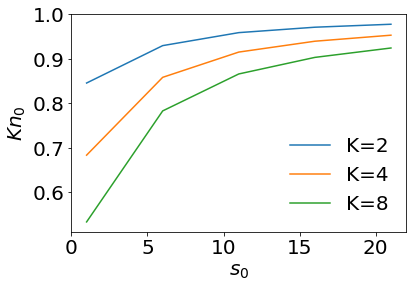

In [69]:
_ = plot_uniform_networks( resuni)

In [70]:
def trCuni(n0, s0, K):
    s2 = s0*s0
    n = 2./(K-1.)*(1./K - n0)
    trC = K*s2/n0*(n0/n/s2 + 1)/(n0/n/s2 + K)
    return trC

In [71]:
from scipy.optimize import minimize

In [72]:
def A_optimize_uniform( s0, K):
    sol = minimize( lambda x: trCuni( 1./K/(np.exp(-x) + 1), s0, K), 0)
    n0 = 1./K/(np.exp( -sol.x[0]) + 1)
    trC = trCuni( n0, s0, K)
    return n0, trC

In [73]:
def plot_uniform_networks2():
    fig, ax = plt.subplots()
    ps = np.arange(1, 6)
    ds = np.logspace( -0.25, 2, 50)
    for p in ps:
        K = 1<<p
        n0s = np.array( [ A_optimize_uniform( s0, K)[0] for s0 in ds ])
        ax.plot( ds, K*n0s, label='K=%d' % K)
    ax.legend( loc='best', frameon=False)
    ax.set_xlabel( r'$s_0$')
    ax.set_ylabel( r'$K \times n_0$')
    ax.set_xscale( 'log')
    return fig

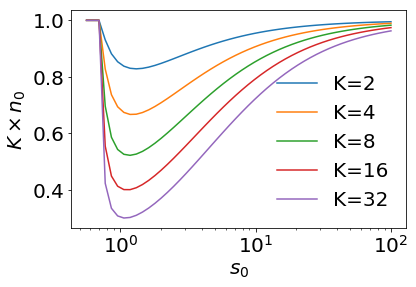

In [74]:
_ = plot_uniform_networks2()

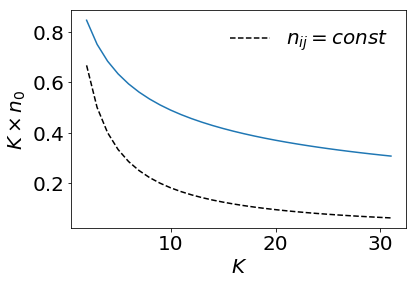

In [75]:
def plot_uniform_networks3():
    fig, ax = plt.subplots()
    Ks = np.arange(2, 32)
    n0s = np.array( [ A_optimize_uniform( 1., K)[0] for K in Ks ])
    ax.plot( Ks, Ks*n0s)
    ax.plot( Ks, 2/(Ks + 1.), 'k--', label=r'$n_{ij} = const$')
    ax.set_xlabel( r'$K$')
    ax.set_ylabel( r'$K\times n_0$')
    ax.legend( loc='best', frameon=False)
    return fig

_ = plot_uniform_networks3()

## Maximum-likelihood estimator

In [76]:
disconnect = 4
x0, xij, invsij2 = fabricate_measurements(20, noerror=False, disconnect=4)
xML, vML = dn.MLestimate( xij, invsij2, np.concatenate( [x0[:3], [None]*(20 - 3)]))

Text(0,0.5,u'$x_{ML}$')

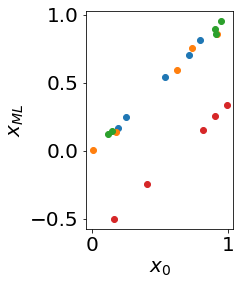

In [77]:
for j in xrange(4): 
    plt.plot( x0[j::4], xML[j::4], 'o')
plt.gca().set_aspect( 1)
plt.gca().set_xlabel( r'$x_0$')
plt.gca().set_ylabel( r'$x_{ML}$')

# Iterative estimate while updating A-optimal network

In [78]:
dGCOX2 = np.array( [ -9.9, -8.9, -9.5, -7.2, -9.4, -4.6, -9, -9.6 ])

In [79]:
def update_mean_stddev( nnew, meannew, signew, nprev, meanprev, sigprev):
    '''
    Given the mean and standard deviation estimated based on nnew new samples and the mean and sigma based on nprev previous samples, 
    update the estimate of the mean and standard deviation.
    '''
    ntotal = nprev + nnew
    mean = (nprev*meanprev + nnew*meannew)/ntotal
    sig2 = (nprev*sigprev*sigprev + nnew*signew*signew + nprev*(meanprev*meanprev - meannew*meannew))/ntotal \
        + (meannew*meannew - mean*mean)
    return mean, np.sqrt(sig2)

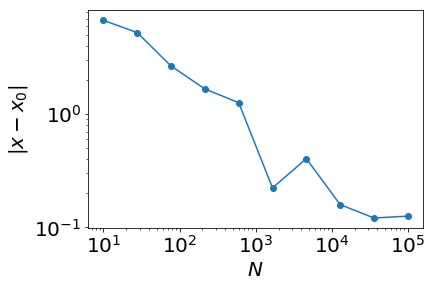

In [80]:
def unit_test_update_mean_stddev():
    n1, n2 = 100, 30
    x0, sigma0 = 1, 25
    s = np.random.normal( x0, sigma0, n1+n2)
    mean, sigma = np.mean( s), np.std( s)
    mean1, sigma1 = np.mean( s[:n1]), np.std( s[:n1])
    mean2, sigma2 = np.mean( s[n1:]), np.std( s[n1:])
    meanp, sigmap = update_mean_stddev( n1, mean1, sigma1, n2, mean2, sigma2)
    assert( np.abs( mean - meanp) < 1e-10 and np.abs( sigma - sigmap) < 1e-10)

    means, sigmas = [], []
    mean, sigma = 0, 0
    fig, ax = plt.subplots()
    nprev = 0
    ns = np.logspace( 1, 5, 10)
    for n in ns:
        nact = int(n) - nprev
        s = np.random.normal( x0, sigma0, nact)
        meannew, sigmanew = np.mean(s), np.std(s)
        mean, sigma = update_mean_stddev( nprev, mean, sigma, nact, meannew, sigmanew)
        means.append( mean)
        sigmas.append( sigma)
        nprev = int(n)
        
    means = np.asarray( means)
    sigmas = np.asarray( sigmas)
    
    ax.plot( ns, np.abs(means - x0), 'o-')
    ax.set_yscale( 'log')
    ax.set_xscale( 'log')
    ax.set_xlabel( '$N$')
    ax.set_ylabel( r'$|x - x_0|$')
    
    return fig

_ = unit_test_update_mean_stddev()

In [81]:
def sample_diffnet( ntotals, fij, xtrue, strue):
    '''
    fij is the fraction of sampling spent on the pair (i,j): (\sum_i + \sum_{i<j}) f_{ij} = 1
    '''
    K = len(xtrue)
    xijtrue = np.zeros( (K, K), dtype=float)
    for i in xrange( K):
        xijtrue[i,i] = xtrue[i]
        for j in xrange( i+1, K):
            xijtrue[i,j] = xtrue[i] - xtrue[j]
            xijtrue[j,i] = -xijtrue[i,j]
    xij = np.zeros( (K, K), dtype=float)
    sij = np.zeros( (K, K), dtype=float)
    xtrj = []
    nprev = 0
    nij = np.zeros( (K,K), dtype=int)
    for t, nsofar in enumerate( ntotals):
        nactual = np.asarray(fij*(nsofar - nprev), dtype=int)
        invsij2 = np.zeros( (K, K), dtype=float)
        for i in xrange(K):
            for j in xrange(i, K):
                if nactual[i,j] > 0:
                    gij = np.random.normal( xijtrue[i,j], strue[i,j], nactual[i,j])
                    xijnew = np.mean( gij)
                    sijnew = np.std( gij)
                    # update the sij according to the actual estimate of the standard deviations
                    xij[i,j], sij[i,j] = update_mean_stddev( nij[i,j], xij[i,j], sij[i,j], nactual[i,j],
                                                             xijnew, sijnew)
                    nij[i,j] += nactual[i,j]
                    nij[j,i] = nij[i,j]
                    if i!=j: xij[j,i] = -xij[i,j]
                    sij[j,i] = sij[i,j]
                    invsij2[i,j] = invsij2[j,i] = nij[i,j]/(sij[i,j]*sij[i,j])
        x, v = dn.MLestimate( xij, invsij2)
        xtrj.append( x)
        nprev = nsofar
    print nij
    return np.array(xtrj)

In [82]:
def iterative_diffnet( xtrue, strue, N=20000, Nmin=1000, stages=10, rseed=1):
    '''
    Iteratively optimize the diffnet with the latest estimate of the fluctuations (standard error).
    '''
    np.random.seed( rseed)
    K = len(xtrue)
    xijtrue = np.zeros( (K, K), dtype=float)
    for i in xrange( K):
        xijtrue[i,i] = xtrue[i]
        for j in xrange( i+1, K):
            xijtrue[i,j] = xtrue[i] - xtrue[j]
            xijtrue[j,i] = -xijtrue[i,j]

    nij = np.zeros( (K, K), dtype=int)
    xij = np.zeros( (K, K), dtype=float)
    # Initialize s as random.
    sij = np.random.rand( K, K)
    
    # The trajectory of x, sij, tr(C), and nij
    xtrj = []    
    sijtrj = []
    trCtrj = []
    nijtrj = []
    
    Ns = np.logspace( np.log10( Nmin), np.log10( N), stages)

    for ntotal in Ns:
        nadd = ntotal - dn.sum_upper_triangle( matrix( nij))
        nopt = dn.A_optimize( matrix(sij), nadd, matrix(nij))
        nactual = dn.round_to_integers( nopt)
        
        smin, smax = np.inf, 0
        invsij2 = np.zeros( (K, K), dtype=float)
        for i in xrange( K):
            for j in xrange( i, K):
                if nactual[i,j] > 0:
                    gij = np.random.normal( xijtrue[i,j], strue[i,j], nactual[i,j])
                    xijnew = np.mean( gij)
                    sijnew = np.std(gij)
                    # print i, j, nactual[i,j], sijnew, strue[i,j]
                    # update the sij according to the actual estimate of the standard deviations
                    xij[i,j], sij[i,j] = update_mean_stddev( nij[i,j], xij[i,j], sij[i,j], nactual[i,j],
                                                             xijnew, sijnew)
                    nij[i,j] += nactual[i,j]
                    nij[j,i] = nij[i,j]
                    sij[j,i] = sij[i,j]
                    if nij[i,j]>1: # sij is only meaningful if we have more than 1 sample.
                        sigmaij2 = sij[i,j]*sij[i,j]/nij[i,j]  # The standard error is \sigma_{ij}^2 = s_{ij}^2/n_{ij}
                        invsij2[i,j] = invsij2[j,i] = 1/sigmaij2
                    if (j!=i): xij[j,i] = -xij[i, j]
                    if sij[i,j] > smax: smax = sij[i,j]
                    if sij[i,j] < smin: smin = sij[i,j]
        
        # For pairs where a difference has not been estimated, we set sij to be a random number between smin and smax
        for i in xrange( K):
            for j in xrange( i, K):
                if nij[i,j] <= 1: # Need at 2 samples to have meaningful sij estimate
                    z = np.random.rand( 1)
                    sij[i,j] = smin*(1 - z) + smax*z
                    sij[j,i] = sij[i,j]

        x, v = dn.MLestimate( xij, invsij2)
        xtrj.append( x)
        sijtrj.append( np.copy(sij))
        ntotal = dn.sum_upper_triangle( matrix(nij))
        cov = dn.covariance( cvxopt.div(matrix(nij/float(ntotal)), matrix(sij)**2))
        trCtrj.append( np.trace( cov)/ntotal)
        nijtrj.append( np.copy(nij))
        
    return np.array(xtrj), np.array(sijtrj), np.array(trCtrj), np.array(nijtrj)

In [83]:
nijCOX2 = dn.A_optimize( sCOX2)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+02  5e+00  2e+01  1e+00
 1:  6.7642e+00  7.0589e+00  4e+01  1e+00  4e+00  5e-01
 2:  1.2484e+01  1.4658e+01  5e+02  2e+00  9e+00  3e+00
 3:  3.0422e+01  3.1083e+01  9e+01  3e-01  1e+00  7e-01
 4:  5.1221e+01  5.2095e+01  1e+02  2e-01  7e-01  9e-01
 5:  8.3845e+01  8.4552e+01  8e+01  8e-02  3e-01  7e-01
 6:  6.9602e+01  7.1581e+01  3e+02  1e-01  5e-01  2e+00
 7:  1.2153e+02  1.2245e+02  2e+02  6e-02  2e-01  9e-01
 8:  1.5746e+02  1.5824e+02  1e+02  4e-02  1e-01  8e-01
 9:  1.5108e+02  1.5223e+02  2e+02  5e-02  2e-01  1e+00
10:  1.8708e+02  1.8818e+02  2e+02  3e-02  1e-01  1e+00
11:  2.5809e+02  2.5909e+02  1e+02  2e-02  6e-02  1e+00
12:  2.4815e+02  2.4969e+02  2e+02  2e-02  7e-02  2e+00
13:  3.5299e+02  3.5427e+02  2e+02  9e-03  3e-02  1e+00
14:  3.9943e+02  4.0024e+02  1e+02  4e-03  2e-02  8e-01
15:  4.2306e+02  4.2385e+02  1e+02  4e-03  1e-02  8e-01
16:  4.7715e+02  4.7743e+02  4e+01  1e-03  4e-03  

In [84]:
nMSTCOX2 = dn.MST_optimize( sCOX2, allocation='n')

In [85]:
trCoptCOX2 = np.trace( dn.covariance( cvxopt.div( nijCOX2, sCOX2**2 )))
trCMSTCOX2 = np.trace( dn.covariance( cvxopt.div( nMSTCOX2, sCOX2**2 )))

In [86]:
TRIALS = 5
dGCOX2trj = []
sCOX2trj = []
trCCOX2trj = []
nijCOX2trj = []
dGCOX2MSTtrj = []
dGCOX2Aopttrj = []
for t in xrange( TRIALS):
    _dgtrj, _sijtrj, _trCtrj, _nijtrj = iterative_diffnet( dGCOX2, sCOX2, N=10000, rseed=2019 + t)
    dGCOX2trj.append( _dgtrj)
    sCOX2trj.append( _sijtrj)
    trCCOX2trj.append( _trCtrj)
    nijCOX2trj.append( _nijtrj)
    _dgMSTtrj = sample_diffnet( [ dn.sum_upper_triangle( matrix(n)) for n in _nijtrj ], nMSTCOX2, dGCOX2, sCOX2)
    _dgAtrj = sample_diffnet( [ dn.sum_upper_triangle( matrix(n)) for n in _nijtrj ], nijCOX2, dGCOX2, sCOX2)
    dGCOX2MSTtrj.append( _dgMSTtrj)
    dGCOX2Aopttrj.append( _dgAtrj)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+04  3e+02  7e+03  1e+00
 1:  6.0732e+01  6.4379e+01  3e+03  7e+01  2e+03  4e+00
 2:  4.6106e+01  5.1112e+01  2e+03  3e+01  8e+02  5e+00
 3:  4.7111e+01  5.3889e+01  1e+03  2e+01  4e+02  7e+00
 4:  1.0304e+01  1.1942e+01  3e+02  3e+00  9e+01  2e+00
 5:  2.3184e+00  2.6842e+00  4e+01  6e-01  1e+01  4e-01
 6:  3.1611e+00  3.6698e+00  6e+01  5e-01  1e+01  5e-01
 7:  6.8722e-01  8.0798e-01  2e+01  1e-01  3e+00  1e-01
 8:  3.8206e-02  4.1831e-02  4e-01  3e-03  7e-02  4e-03
 9:  1.9019e-02  1.9625e-02  5e-02  3e-04  8e-03  6e-04
10:  1.1810e-02  1.2113e-02  2e-02  1e-04  3e-03  3e-04
11:  9.7372e-03  9.9891e-03  2e-02  8e-05  2e-03  3e-04
12:  7.2057e-03  7.3211e-03  1e-02  3e-05  7e-04  1e-04
13:  5.7513e-03  5.8461e-03  1e-02  2e-05  5e-04  9e-05
14:  4.9770e-03  5.0246e-03  6e-03  9e-06  2e-04  5e-05
15:  3.9167e-03  3.9452e-03  3e-03  4e-06  9e-05  3e-05
16:  3.5294e-03  3.5564e-03  3e-03  3e-06  7e-05  

17:  6.7363e-02  6.7363e-02  2e-08  3e-13  1e-11  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.5372e+04  3e+04  6e-01  2e+01  1e+00
 1:  1.0883e+02 -3.0152e+04  5e+04  7e-01  2e+01  4e+01
 2:  8.7486e+04 -1.3539e+06  2e+08  4e+01  1e+03  2e+04
 3: -1.6060e+03 -1.1929e+04  5e+04  6e-01  2e+01  1e+04
 4: -1.3456e+02 -3.1086e+03  7e+03  7e-02  2e+00  1e+02
 5: -2.8693e+00 -8.8786e+01  2e+02  2e-03  7e-02  6e+00
 6:  2.3556e-02 -8.8776e-01  2e+00  2e-05  7e-04  6e-02
 7:  5.2598e-02 -6.0383e-03  1e-01  1e-06  4e-05  4e-03
 8:  5.3105e-02  3.3948e-02  3e-02  5e-07  1e-05  4e-04
 9:  5.2439e-02  4.8648e-02  6e-03  9e-08  3e-06  7e-05
10:  5.1800e-02  5.0657e-02  2e-03  3e-08  8e-07  2e-05
11:  5.1722e-02  5.1270e-02  7e-04  1e-08  3e-07  7e-06
12:  5.1639e-02  5.1590e-02  7e-05  1e-09  4e-08  7e-07
13:  5.1630e-02  5.1621e-02  1e-05  2e-10  7e-09  1e-07
14:  5.1627e-02  5.1627e-02  6e-07  1e-11  3e-10  6e-09
15:  5.1627e-02  5.1627e-0

 2:  1.8916e+03 -1.9964e+04  2e+05  1e+00  4e+01  5e+02
 3: -1.8604e+02 -1.9933e+03  5e+03  2e-01  5e+00  7e+02
 4: -1.0246e+01 -1.5922e+02  3e+02  1e-02  3e-01  6e+00
 5:  3.0656e-02 -1.9179e+00  3e+00  1e-04  4e-03  8e-02
 6:  1.5154e-01  7.4120e-02  1e-01  5e-06  2e-04  3e-03
 7:  1.5020e-01  1.2984e-01  3e-02  1e-06  4e-05  7e-04
 8:  1.4214e-01  1.3625e-01  9e-03  4e-07  1e-05  1e-04
 9:  1.4166e-01  1.3976e-01  3e-03  1e-07  4e-06  3e-05
10:  1.4129e-01  1.4110e-01  3e-04  1e-08  4e-07  3e-06
11:  1.4126e-01  1.4124e-01  3e-05  1e-09  3e-08  3e-07
12:  1.4125e-01  1.4125e-01  3e-06  1e-10  3e-09  3e-08
13:  1.4125e-01  1.4125e-01  3e-07  1e-11  4e-10  3e-09
14:  1.4125e-01  1.4125e-01  2e-08  1e-12  3e-11  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.1932e+04  2e+04  7e-01  2e+01  1e+00
 1:  6.9115e+01 -1.4291e+04  3e+04  8e-01  2e+01  2e+01
 2:  4.5731e+04 -7.2300e+05  1e+08  4e+01  1e+03  1e+04
 3: -8.8858e+02 -6.8986e+0

 2:  4.6659e+02 -5.6731e+03  4e+04  1e+00  7e+01  3e+02
 3: -1.0658e+02 -7.6772e+02  2e+03  2e-01  8e+00  1e+02
 4: -5.8794e+00 -5.8641e+01  1e+02  1e-02  6e-01  6e+00
 5:  9.6783e-02 -1.0561e+00  2e+00  3e-04  1e-02  1e-01
 6:  1.7620e-01 -2.8236e-02  4e-01  5e-05  2e-03  2e-02
 7:  1.5315e-01  5.4662e-02  2e-01  2e-05  1e-03  9e-03
 8:  1.3305e-01  5.5938e-02  2e-01  2e-05  9e-04  6e-03
 9:  1.3201e-01  7.2197e-02  1e-01  1e-05  7e-04  3e-03
10:  1.1172e-01  9.5041e-02  5e-02  4e-06  2e-04  1e-03
11:  1.0270e-01  9.2000e-02  4e-02  2e-06  1e-04  6e-04
12:  1.0158e-01  9.3623e-02  3e-02  2e-06  9e-05  3e-04
13:  9.5900e-02  9.4141e-02  7e-03  4e-07  2e-05  8e-05
14:  9.4248e-02  9.3968e-02  1e-03  6e-08  3e-06  1e-05
15:  9.4019e-02  9.3963e-02  2e-04  1e-08  6e-07  2e-06
16:  9.3963e-02  9.3957e-02  2e-05  1e-09  7e-08  2e-07
17:  9.3957e-02  9.3956e-02  2e-06  1e-10  7e-09  2e-08
18:  9.3956e-02  9.3956e-02  2e-07  1e-11  5e-10  2e-09
19:  9.3956e-02  9.3956e-02  1e-08  8e-13  4e-11

[[702 220 197   0 220   0 214   0]
 [220 702   0 197   0 220   0 214]
 [197   0 721 220 197   0 219   0]
 [  0 197 220 721   0 197   0 219]
 [220   0 197   0 978 218 101   0]
 [  0 220   0 197 218 978   0 101]
 [214   0 219   0 101   0 956 214]
 [  0 214   0 219   0 101 214 956]]
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -0.0000e+00  2e+04  3e+02  9e+04  1e+00
 1:  5.0508e+01  5.3143e+01  2e+03  4e+01  1e+04  3e+00
 2:  1.9711e+01  2.1051e+01  5e+02  1e+01  3e+03  1e+00
 3:  8.5464e+00  9.5183e+00  3e+02  6e+00  2e+03  1e+00
 4:  4.4874e+00  5.1076e+00  1e+02  2e+00  7e+02  6e-01
 5:  8.5200e-01  9.5534e-01  2e+01  4e-01  1e+02  1e-01
 6:  1.0535e+00  1.2106e+00  2e+01  3e-01  9e+01  2e-01
 7:  2.3668e-01  2.7332e-01  5e+00  5e-02  2e+01  4e-02
 8:  7.6462e-02  8.5768e-02  1e+00  1e-02  3e+00  9e-03
 9:  2.6466e-02  2.7721e-02  1e-01  1e-03  4e-01  1e-03
10:  1.6878e-02  1.7446e-02  5e-02  4e-04  1e-01  6e-04
11:  1.1506e-02  1.1913e-02  4e-02  2e-04  6e-02 

13:  1.1328e-01  1.1328e-01  3e-07  2e-11  3e-10  2e-09
14:  1.1328e-01  1.1328e-01  1e-08  8e-13  1e-11  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.4892e+04  3e+04  1e+00  2e+01  1e+00
 1: -1.3750e+02 -1.3880e+04  3e+04  1e+00  2e+01  7e+01
 2:  8.2241e+02 -1.2135e+04  6e+04  1e+00  2e+01  6e+02
 3: -1.5919e+02 -1.2574e+03  3e+03  1e-01  2e+00  2e+02
 4: -5.2211e+00 -4.8727e+01  8e+01  4e-03  6e-02  5e+00
 5:  3.3000e-02 -4.6226e-01  8e-01  5e-05  7e-04  6e-02
 6:  8.8545e-02  5.2944e-02  6e-02  3e-06  5e-05  4e-03
 7:  8.9561e-02  8.0116e-02  2e-02  8e-07  1e-05  6e-04
 8:  8.7785e-02  8.5442e-02  4e-03  2e-07  3e-06  1e-04
 9:  8.7706e-02  8.6249e-02  2e-03  1e-07  2e-06  5e-05
10:  8.7423e-02  8.7262e-02  2e-04  1e-08  2e-07  5e-06
11:  8.7396e-02  8.7350e-02  7e-05  4e-09  6e-08  1e-06
12:  8.7388e-02  8.7379e-02  1e-05  7e-10  1e-08  2e-07
13:  8.7386e-02  8.7385e-02  9e-07  5e-11  8e-10  1e-08
14:  8.7386e-02  8.7385e-0

11:  2.0981e-01  2.0866e-01  2e-03  2e-07  3e-06  2e-05
12:  2.0944e-01  2.0923e-01  3e-04  3e-08  6e-07  3e-06
13:  2.0940e-01  2.0929e-01  2e-04  2e-08  3e-07  2e-06
14:  2.0936e-01  2.0935e-01  2e-05  2e-09  3e-08  2e-07
15:  2.0936e-01  2.0936e-01  2e-06  2e-10  3e-09  1e-08
16:  2.0936e-01  2.0936e-01  2e-07  2e-11  4e-10  2e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1876e+03  1e+04  9e-01  2e+01  1e+00
 1:  1.0310e+02 -8.1987e+03  2e+04  1e+00  2e+01  2e+01
 2:  2.1809e+03 -3.0557e+04  6e+05  4e+00  9e+01  1e+03
 3: -4.3286e+02 -2.9263e+03  9e+03  5e-01  1e+01  1e+03
 4: -4.4131e+01 -4.5127e+02  8e+02  5e-02  1e+00  1e+01
 5: -1.8199e+00 -2.2634e+01  4e+01  3e-03  6e-02  7e-01
 6:  9.1401e-02 -9.6746e-01  2e+00  1e-04  3e-03  3e-02
 7:  1.6748e-01 -2.8504e-02  3e-01  3e-05  5e-04  4e-03
 8:  1.5296e-01  9.3763e-02  1e-01  8e-06  2e-04  1e-03
 9:  1.4581e-01  1.1436e-01  5e-02  4e-06  8e-05  6e-04
10:  1.4269e-01  1.3029e-0

In [87]:
[ dn.sum_upper_triangle( matrix(nijCOX2trj[i][-1])) for i in xrange(TRIALS) ]

[10000.0, 10000.0, 10000.0, 10000.0, 10000.0]

In [88]:
trCoptCOX2, trCMSTCOX2

(507.17100971174864, 2032.0000000000045)

In [89]:
def divergence_from_optimal( nijs, nopt, epsilon=1e-15):
    D = np.zeros( len(nijs))
    K = nijs[0].shape[0]
    for t, nij in enumerate( nijs):
        nij = nij/dn.sum_upper_triangle( matrix(nij))
        d = 0.
        for i in xrange( K):
            for j in xrange( i, K):
                if nij[i,j]>0: 
                    d += nij[i,j]*np.log( nij[i,j]/(nopt[i,j] + epsilon))
        D[t] = d
    return D

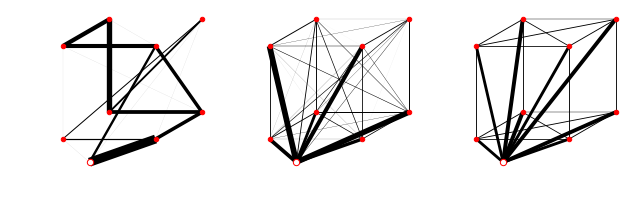

In [90]:
def compare_diffnets( nijbegin, nijend, nopt):
    nijb = nijbegin/dn.sum_upper_triangle( matrix( nijbegin))
    nije = nijend/dn.sum_upper_triangle( matrix( nijend))
    fig, axes = plt.subplots( 1, 3, sharey=True, figsize=(10.5, 3))
    pos = cubeLayout( True)
    for t, nij in enumerate( [nijb, nije, nopt]):
        G = gph.diffnet_to_graph( nij, 'O')
        gph.draw_diffnet_graph( G, pos=pos, ax=axes[t])
        axes[t].set_aspect( 1)
        axes[t].axis( 'off')
    return fig

_ = compare_diffnets( nijCOX2trj[0][0], nijCOX2trj[0][-1], nijCOX2)

Speed-up over MST: 3.807 +/- 0.099
tr(C) reduction from MST: 0.263 +/- 0.007


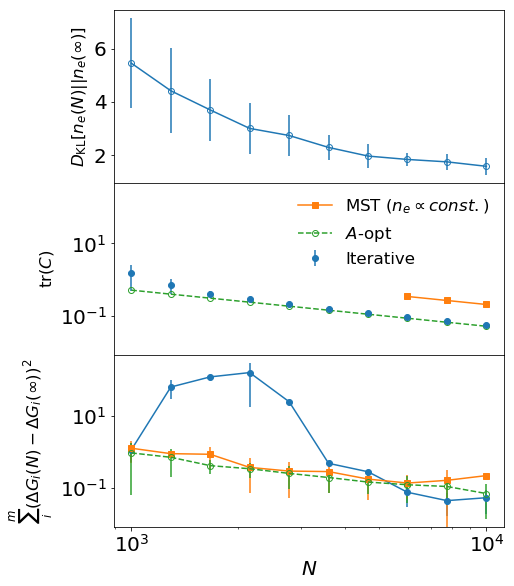

In [91]:
def plot_iteration_toward_optimal( nijtrjs, trCtrjs, xtrjs, xtrue, nopt, trCrefs, xref):
    fig, axes = plt.subplots( 3, 1, sharex=True, figsize=(7, 9.5))
    ntotal = np.array( [ [ dn.sum_upper_triangle( matrix( nij)) for nij in nijtrj ]
                         for nijtrj in nijtrjs ])
    ntotal = np.mean( ntotal, axis=0)
    div = np.array( [ divergence_from_optimal( nijtrj, nopt) for nijtrj in nijtrjs ])
    axes[0].errorbar( ntotal, np.mean(div, axis=0), yerr=np.std(div, axis=0), fmt='o-', mfc='none')
    axes[0].set_ylabel( r'$D_{\mathrm{KL}}[n_e(N)||n_e(\infty)]$', fontsize='small')
    
    axes[1].errorbar( ntotal, np.mean( trCtrjs, axis=0), yerr=np.std(trCtrjs, axis=0), fmt='o', label='Iterative')
    axes[1].plot( ntotal[-3:], trCrefs['MST']/ntotal[-3:], 's-', label=r'MST ($n_e\propto const.$)')
    axes[1].plot( ntotal, trCrefs['A']/ntotal, 'o--', mfc='none', label=r'$A$-opt')
    axes[1].set_ylabel( r'$\mathrm{tr}(C)$', fontsize='small')
    axes[1].set_yscale( 'log')
    axes[1].legend( loc='best', fontsize='small', frameon=False)
    ymin1, ymax1 = axes[1].get_ylim()
    
    dx2 = np.sum(np.square(xtrjs - xtrue), axis=2)
    axes[2].errorbar( ntotal, np.mean( dx2, axis=0), yerr=np.std( dx2, axis=0), fmt='o-')
    dx2MST = np.sum(np.square(xref['MST'] - xtrue), axis=2)
    axes[2].errorbar( ntotal, np.mean( dx2MST, axis=0), yerr=np.std( dx2MST, axis=0), fmt='s-')
    dx2A = np.sum(np.square(xref['A'] - xtrue), axis=2)
    axes[2].errorbar( ntotal, np.mean( dx2A, axis=0), yerr=np.std( dx2A, axis=0), fmt='o--', mfc='none')
    axes[2].set_yscale( 'log')    
    ymin2, ymax2 = axes[2].get_ylim()
    
    ymin = min(ymin1, ymin2)
    ymax = max(ymax1, ymax2)
    for ax in axes[1:]: ax.set_ylim( ymin, ymax) # tr(C) and ddG should have the same y-scale
    
    axes[2].set_ylabel( r'$\sum_i^m(\Delta G_i(N) - \Delta G_i(\infty))^2$', fontsize='small')
    axes[-1].set_xscale( 'log')
    axes[-1].set_xlabel( r'$N$')
    fig.subplots_adjust( hspace=0)
    
    speedup = (trCrefs['MST']/ntotal[-1])/np.array(trCtrjs)[:,-1]
    print 'Speed-up over MST: %.3f +/- %.3f' % (np.mean( speedup), np.std( speedup))
    print 'tr(C) reduction from MST: %.3f +/- %.3f' % (np.mean( 1/speedup), np.std( 1/speedup))
    return fig

figiter = plot_iteration_toward_optimal( nijCOX2trj, trCCOX2trj, dGCOX2trj, dGCOX2, nijCOX2, 
                                      dict( A=trCoptCOX2, MST=trCMSTCOX2), dict( A=dGCOX2Aopttrj, MST=dGCOX2MSTtrj))

In [92]:
# figiter.savefig( 'diffnet-iter.eps', bbox_inches='tight')

Verify that the estimated standard error has a margin of uncertainty that scales with $n^{-1/2}$.

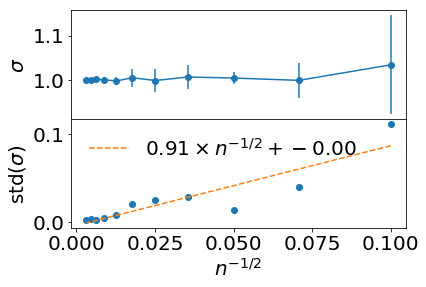

In [93]:
def sigma_vs_sample( strue=1., nmax=100000):
    blocks = 5
    x = np.random.normal( 0, strue, nmax*blocks)
    ns = np.logspace( 2, np.log10( nmax), np.log( nmax))
    smean = np.zeros( len(ns))
    sstd = np.zeros( len(ns))
    for k, n in enumerate(ns):
        n = int(n)
        sigma = np.array([ np.std( x[b*n:(b+1)*n]) for b in xrange( blocks) ])
        smean[k] = np.mean(sigma)
        sstd[k] = np.std( sigma)
    return ns, smean, sstd

def plot_sigma_vs_sample():
    ns, smean, sstd = sigma_vs_sample( 1.)
    from scipy.stats import linregress
    sqrtin = np.sqrt(1/ns)
    res = linregress( sqrtin, sstd)
    
    fig, axes = plt.subplots(2, 1, sharex=True)
    axes[0].errorbar( sqrtin, smean, yerr=sstd, fmt='o-')
    axes[1].plot( sqrtin, sstd, 'o')
    axes[1].plot( sqrtin, res[1] + res[0]*sqrtin, '--', label=r'$%.2f\times n^{-1/2} + %.2f$' % tuple(res[:2]))
    axes[1].set_xlabel( r'$n^{-1/2}$')
    axes[0].set_ylabel( r'$\sigma$')
    axes[1].set_ylabel( r'std($\sigma$)')
    axes[1].legend( loc='best', frameon=False)
    fig.subplots_adjust( hspace=0)
    return fig

_  = plot_sigma_vs_sample()